In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('진짜가중평균.csv',engine='python',encoding='utf-8-sig')
data1 = pd.read_csv('직전년도.csv',engine='python',encoding='utf-8-sig')
data2 = pd.read_csv('프로기록있는선수들통과11.csv') # 대회년도 평균내서 가져오기 위한 용도
key = pd.read_csv('afterdrop.csv',engine='python',encoding='utf-8-sig')

In [3]:
data2 = data2.reset_index(drop=True)
year = data2.groupby(['선수명','대학교']).mean()
data5 =pd.merge(data,year['대회년도'],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)
data3 =pd.merge(data5,data1[['선수명','키','EFF']],how='left',on='선수명').dropna(axis=0).reset_index(drop=True)
data3 = data3.drop(['Unnamed: 0'], axis=1)
final = (data3.drop_duplicates(['선수명'])).reset_index(drop=True)
final_under2003 = (final.loc[(final['대회년도'] > 2003)]).reset_index(drop=True)

In [4]:
for idx, row in final_under2003.iterrows():
    if row['EFF'] < 250: final_under2003 = final_under2003.drop(idx, axis=0)
final_under2003

,선수명,대학교,경기수,전체 출전시간,득점 전체,득점 평균,2점슛 성공,2점슛 시도,2점슛 성공률,3점슛 성공,...,굿디펜스,속공,FBF,턴오버,팀 리바운드,팀 턴오버,년수,대회년도,키,EFF
1,강상재,고려대학교,18.9,4205.098333,233.0,22.9,90.9,162.4,10.807,10.4,...,9.3,8.9,2.6,28.4,0.8,0.0,4.0,2014.5,200.0,807.0
7,권시현,단국대학교,21.1,6670.516667,348.8,30.8,92.9,196.5,9.776,38.7,...,11.8,27.3,14.2,48.9,12.3,6.7,4.0,2016.5,184.0,297.0
9,기승호,동국대학교,5.1,1465.976667,68.8,12.5,23.7,41.3,5.636,4.6,...,4.1,0.0,0.0,8.1,0.0,0.0,4.0,2005.5,194.0,668.0
10,김강선,동국대학교,4.8,1217.563333,65.8,14.4,14.0,21.3,6.354,8.9,...,4.0,0.0,0.0,6.1,0.0,0.0,4.0,2006.5,190.0,541.0
14,김국찬,중앙대학교,17.5,4514.556667,235.1,29.4,58.3,109.8,11.393,30.8,...,7.0,12.9,4.0,35.3,1.1,0.4,4.0,2015.5,190.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,허웅,연세대학교,21.8,5190.245000,282.8,25.8,68.3,127.2,10.436,36.1,...,18.0,25.6,12.0,40.7,20.7,2.0,3.0,2013.0,185.0,843.0
261,허일영,건국대학교,5.1,1613.453333,89.5,16.2,18.1,38.7,4.245,14.7,...,4.8,0.0,0.0,6.9,0.0,0.0,4.0,2006.5,196.0,648.0
263,허효진,중앙대학교,6.1,1244.990000,62.8,9.9,18.3,33.0,5.559,6.5,...,3.8,0.0,0.0,6.5,0.0,0.0,4.0,2004.5,190.0,311.0
264,홍경기,고려대학교,4.0,1365.050000,51.0,12.0,8.0,14.0,5.710,10.0,...,1.0,0.0,0.0,10.0,0.0,0.0,1.0,2010.0,184.0,362.0


In [5]:
df_x = final_under2003.drop(['EFF','년수', '선수명','대학교','대회년도'],axis=1)
df_y = final_under2003['EFF']

In [14]:
x_train, x_valid, y_train, y_valid = train_test_split(df_x, df_y, random_state = 80, test_size = 0.30)
reg_Lasso = Lasso(alpha = 100)
reg_Lasso.fit(x_train, y_train)
y_pred_Lasso = reg_Lasso.predict(x_valid)
r2Lasso = r2_score(y_valid,y_pred_Lasso)
print(r2Lasso) # r-squred 값

0.2114251105248991


In [15]:
reg_Lasso.coef_

array([-0.        ,  0.03868511,  3.59548873,  0.        ,  0.        ,
       -3.66173648, -0.        , -0.        , -4.46665106, -0.        ,
       -0.        , -2.63826416, -0.        , -2.36008786,  0.93894685,
        0.        ,  3.02214429, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -2.89035038, -4.98631931,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        1.11489717, -0.        ,  0.        ])

In [16]:
coef = reg_Lasso.coef_.nonzero()[0]
N = len(y_valid)
p = len(coef)
r2_adj = 1-((1-r2Lasso)*(N-1)/(N-p-1))
print(r2_adj)

features = [df_x.columns[i] for i in coef]
features

-0.2451182465396331


['전체 출전시간',
 '득점 전체',
 '2점슛 시도',
 '3점슛 시도',
 '자유투 시도',
 '공격 리바운드',
 '수비 리바운드',
 '전체 어시스트',
 '파울(자유튜유)',
 '파울(자유투무)',
 '팀 리바운드']

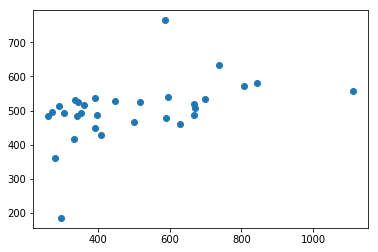

In [17]:
plt.scatter(y_valid,y_pred_Lasso)